# Books Recommender system using clustering
Collaborative filtering


In [143]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
books = pd.read_csv(
    'data/BX-Books.csv', 
    sep=";", on_bad_lines='skip',
    low_memory=False ,
    encoding='latin-1')

In [145]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [146]:
books.shape

(271360, 8)

In [147]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Count books by year

### Bar char

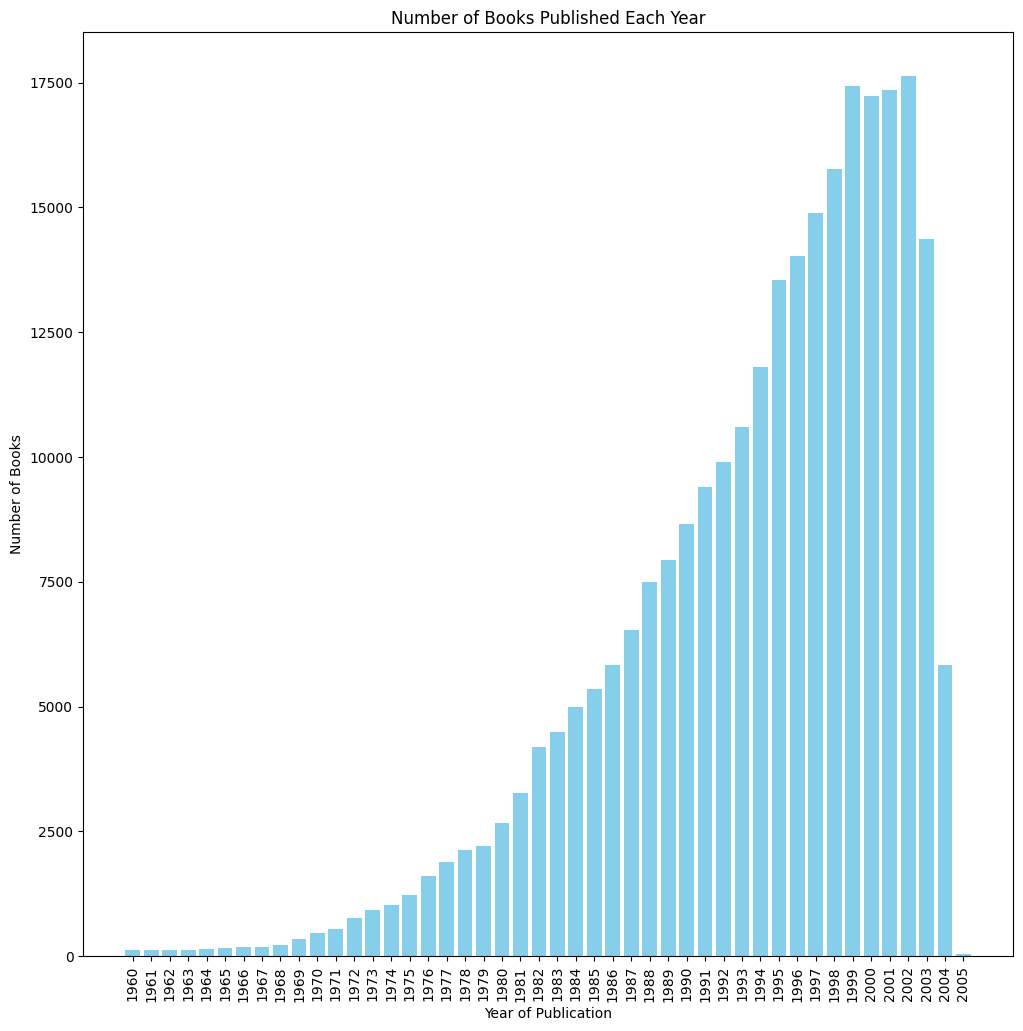

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'year of publication' is the column name
# Group by 'year of publication' and count the number of books for each year
yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()

# Filter out the year 0
yearly_counts = yearly_counts[(yearly_counts.index >= '1960')&('2005'>=yearly_counts.index) ]

# Get the range of years
min_year = yearly_counts.index.min()
max_year = yearly_counts.index.max()

# Filter the data to include only the range of min_year to max_year
yearly_counts = yearly_counts.loc[min_year:max_year]

# Plotting the data
plt.figure(figsize=(12, 12))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Each Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Pie char

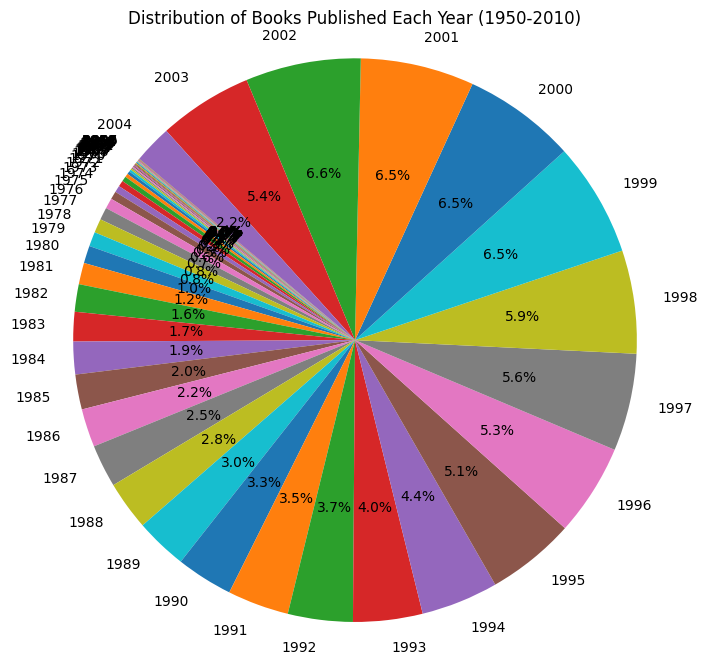

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Year-Of-Publication' is the column name
# Group by 'Year-Of-Publication' and count the number of books for each year
yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()

# Filter out the years outside the range 1950 to 2010
yearly_counts = yearly_counts[(yearly_counts.index >= '1950') & (yearly_counts.index <= '2010')]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_counts.values, labels=yearly_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Books Published Each Year (1950-2010)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top 15 author who have written the most books

In [150]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

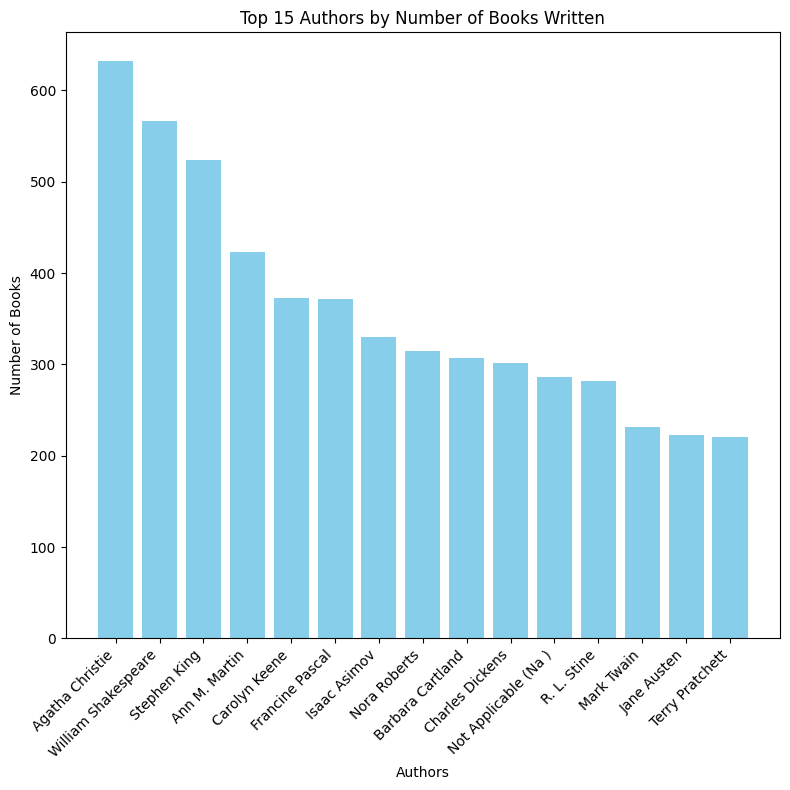

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Book-Author' is the column name
# Count the number of books written by each author
author_counts = books['Book-Author'].value_counts()

# Select the top 15 authors
top_15_authors = author_counts.head(15)

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(top_15_authors.index, top_15_authors.values, color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Top 15 Authors by Number of Books Written')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

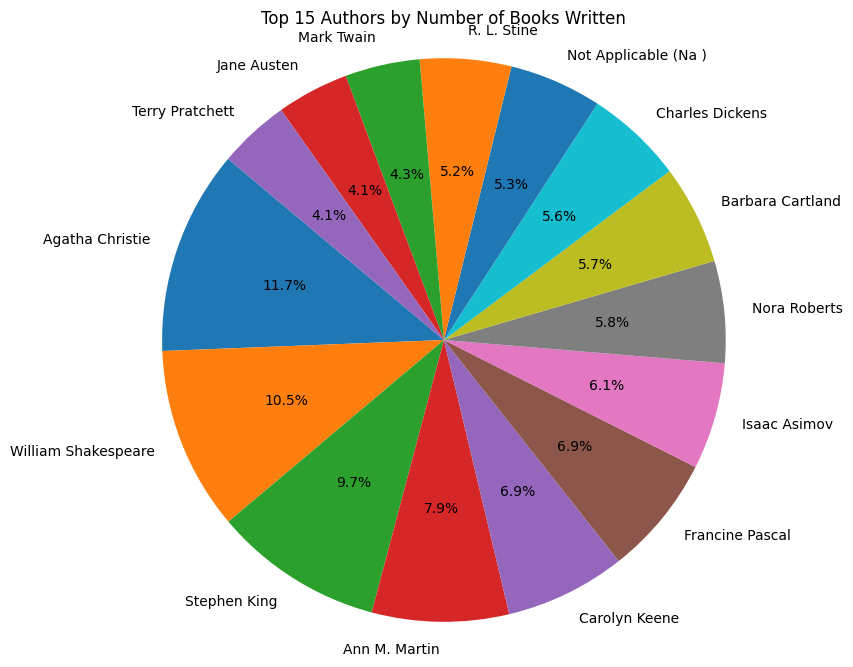

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Book-Author' is the column name
# Count the number of books written by each author
author_counts = books['Book-Author'].value_counts()

# Select the top 15 authors
top_15_authors = author_counts.head(15)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_15_authors.values, labels=top_15_authors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Authors by Number of Books Written')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top publishers with the most books

In [153]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

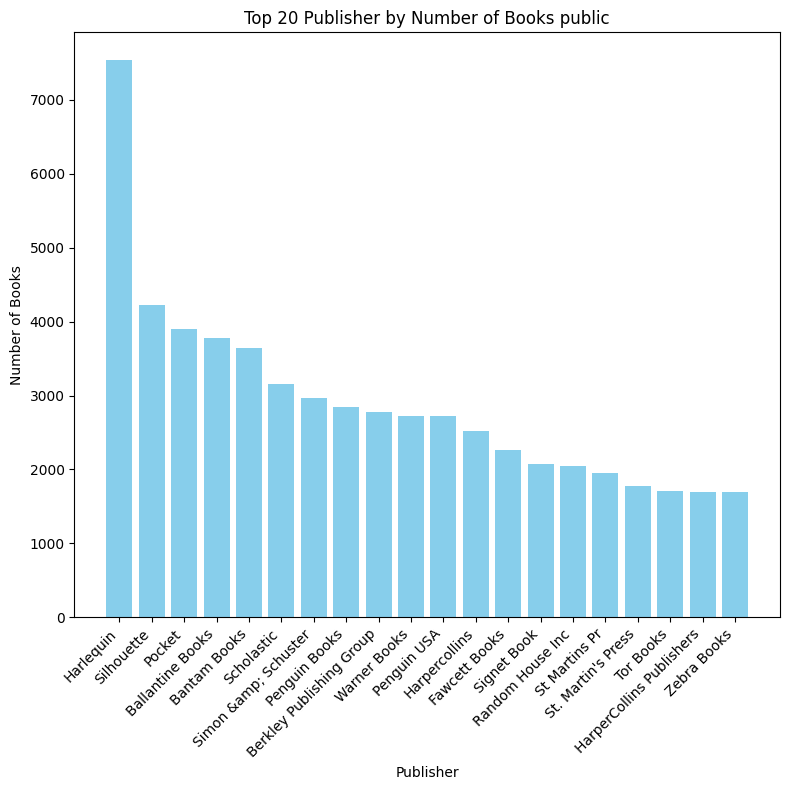

In [154]:
import pandas as pd
import matplotlib.pyplot as plt


publisher_counts = books['Publisher'].value_counts()


top_20_publishers = publisher_counts.head(20)

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(top_20_publishers.index, top_20_publishers.values, color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 20 Publisher by Number of Books public')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

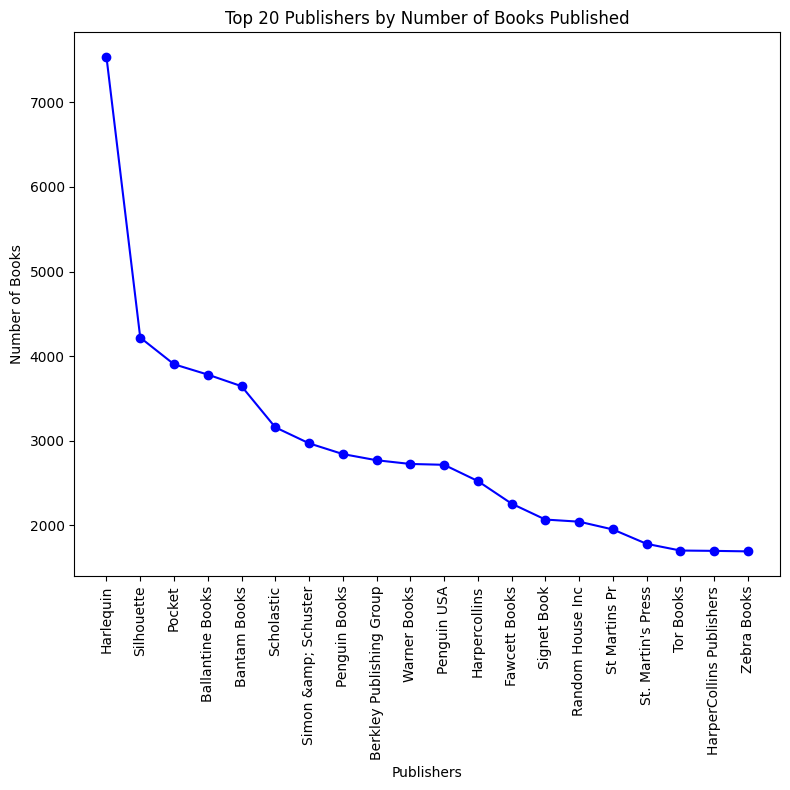

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Publisher' is the column name
# Count the number of books published by each publisher
publisher_counts = books['Publisher'].value_counts()

# Select the top 20 publishers
top_20_publishers = publisher_counts.head(20)

# Plotting the line chart
plt.figure(figsize=(8, 8))
plt.plot(top_20_publishers.index, top_20_publishers.values, marker='o', linestyle='-', color='b')
plt.xlabel('Publishers')
plt.ylabel('Number of Books')
plt.title('Top 20 Publishers by Number of Books Published')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

## Remove large url size


In [156]:
books.shape

(271360, 8)

In [157]:
# before removing 
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [158]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [159]:
books.iloc[237]['Image-URL-S']

'http://images.amazon.com/images/P/0671027387.01.THUMBZZZ.jpg'

In [160]:
# after remove
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [161]:
books.shape

(271360, 6)

In [162]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [163]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [164]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## User rating dataframe

In [165]:

users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [166]:
users.shape

(278858, 3)

In [167]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [168]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [169]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


## Visualize age feature

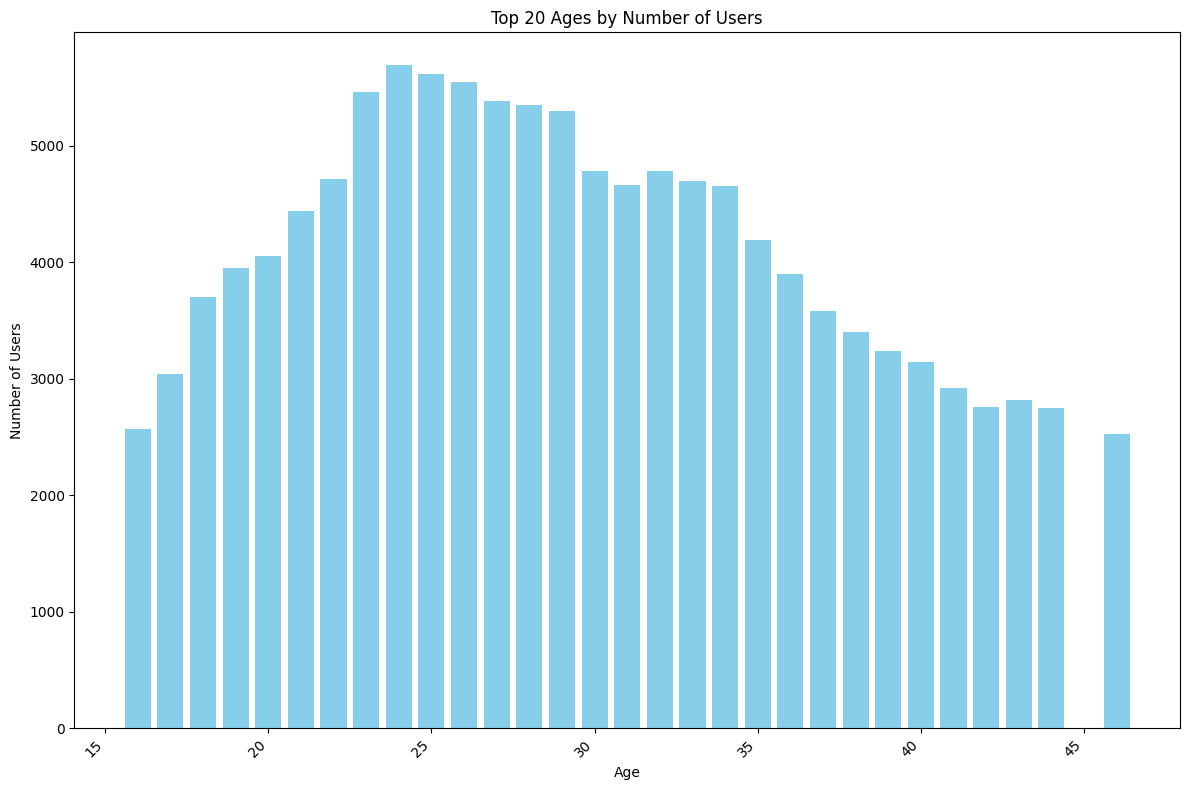

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'users' is your DataFrame and 'Age' is the column name
# Count the number of users for each age
age_counts = users['age'].value_counts()

# Select the top 20 ages
top_20_ages = age_counts.head(30)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_ages.index, top_20_ages.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Top 20 Ages by Number of Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

# Rating dataframe

In [171]:
# Now load the third dataframe
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [172]:
ratings.shape

(1149780, 3)

In [173]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

## Count the number of votes for each star rating

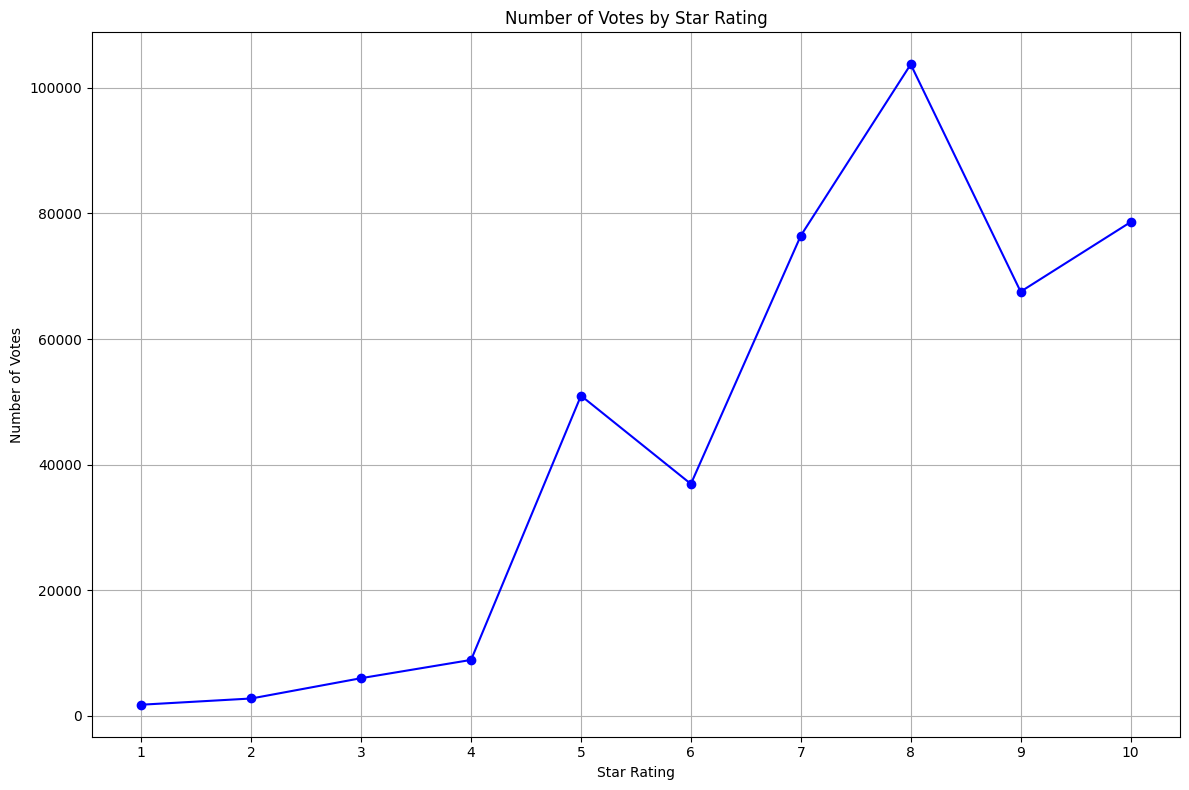

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ratings' is your DataFrame and 'Book-Rating' is the column name for star ratings
# Filter out ratings that are equal to 0
filtered_ratings = ratings[ratings['Book-Rating'] != 0]

# Count the number of votes for each star rating
star_counts = filtered_ratings['Book-Rating'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(star_counts.index, star_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Star Rating')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Star Rating')
plt.xticks(star_counts.index)  # Ensure all star ratings are shown on x-axis
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

## Count the number of votes for each user

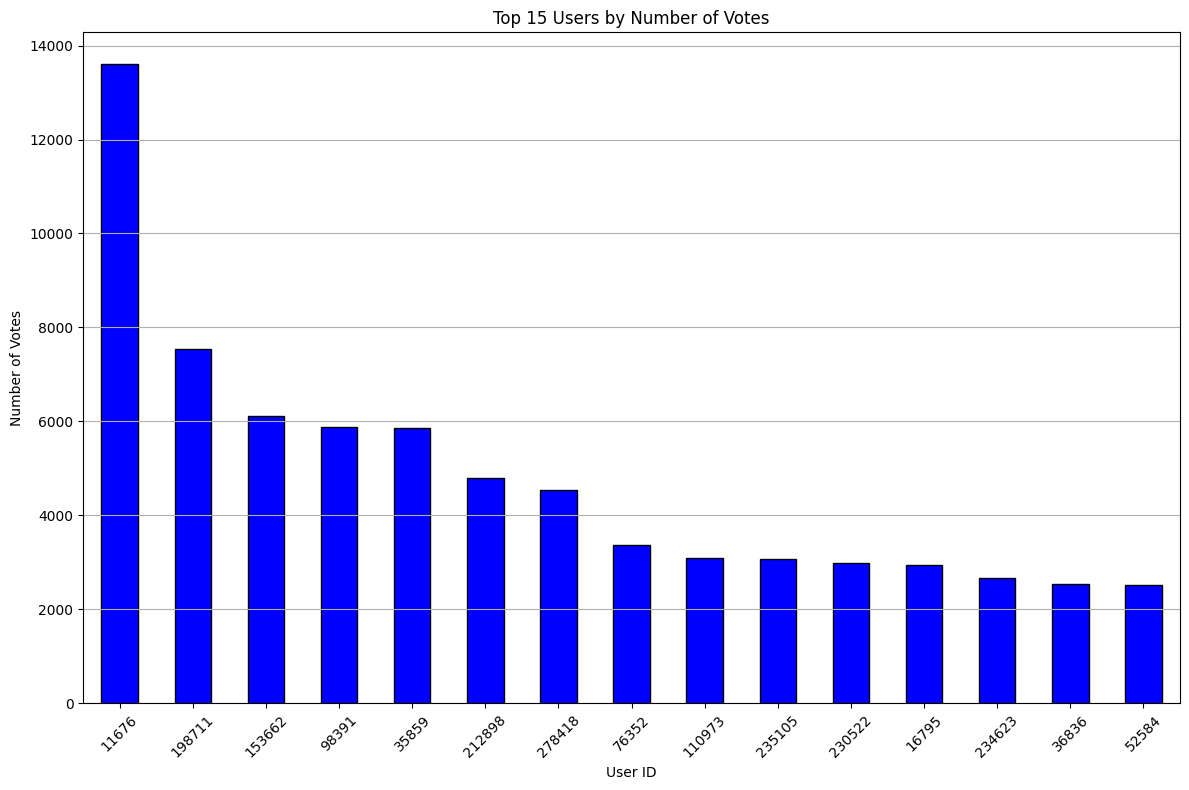

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ratings' is your DataFrame and 'User-ID' is the column name for user IDs
# Count the number of votes for each user
user_vote_counts = ratings['User-ID'].value_counts()

# Select the top 15 users with the maximum number of votes
top_15_users = user_vote_counts.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_15_users.plot(kind='bar', color='b', edgecolor='black')
plt.xlabel('User ID')
plt.ylabel('Number of Votes')
plt.title('Top 15 Users by Number of Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [176]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [177]:
print(f'book dataframe {books.shape}\nusers dataframe {users.shape}\nratings dataframe {ratings.shape}')

book dataframe (271360, 6)
users dataframe (278858, 3)
ratings dataframe (1149780, 3)


In [178]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200
x = x[x]
y= x.index


In [179]:
ratings.shape

(1149780, 3)

In [180]:
ratings['user_id'].isin(y)


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Name: user_id, Length: 1149780, dtype: bool

In [181]:
ratings = ratings[ratings['user_id'].isin(y)]

In [182]:
ratings.shape

(526356, 3)

In [183]:
ratings['user_id'].unique().shape

(899,)

# Join ratings with books

In [184]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [185]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [186]:
# Now join ratings with books by
# ISBN (International Standard Book Number)
ratings_with_books = ratings.merge(books, on='ISBN')

In [187]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [188]:
ratings_with_books.shape

(487671, 8)

In [189]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [190]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [191]:
number_rating.shape

(160269, 2)

In [192]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [193]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [194]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [195]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13


In [196]:
final_rating.shape

(487671, 9)

In [197]:
# Lets take those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_rating'] >= 50]


In [198]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [199]:
final_rating.shape

(61853, 9)

In [200]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [201]:
final_rating.shape

(59850, 9)

In [202]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [203]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(
    columns='user_id',
    index='title',
    values= 'rating'
    )

In [204]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [205]:
book_pivot.shape

(742, 888)

In [206]:
book_pivot.fillna(0, inplace=True)

In [207]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [208]:
from scipy.sparse import csr_matrix

csr matrix help to memory-efficient structures for storing large, mostly empty matrices.Just store index of value not empty and value of them.

In [209]:
book_sparse = csr_matrix(book_pivot)

In [210]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [211]:
# Now import KNN model
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [212]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [213]:
distance, suggestion = model.kneighbors(
    book_pivot.iloc[237,:].values.reshape(1,-1),
    n_neighbors=6 
    )

In [214]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [215]:
suggestion

array([[237, 238, 240, 241, 184, 536]], dtype=int64)

In [216]:
book_pivot.iloc[241,:].values.reshape(1,-1).shape

(1, 888)

In [217]:
book_pivot.iloc[241,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [218]:
for x in (suggestion):
    print(book_pivot.index[x])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


**Find name by index of book**

In [219]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [220]:
#keeping books name
book_names = book_pivot.index

In [221]:
book_names[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [222]:
book_names[241]

"Harry Potter and the Sorcerer's Stone (Book 1)"

In [223]:
np.where(book_pivot.index == 'Harry Potter and the Chamber of Secrets (Book 2)')[0][0]

237

**Find url by name**

In [224]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [225]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [226]:
print(suggestion)

[[237 238 240 241 184 536]]


In [227]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])
    
    

In [228]:
book_name

[Index(['Harry Potter and the Chamber of Secrets (Book 2)',
        'Harry Potter and the Goblet of Fire (Book 4)',
        'Harry Potter and the Prisoner of Azkaban (Book 3)',
        'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
        'The Cradle Will Fall'],
       dtype='object', name='title')]

In [229]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [230]:
ids_index

[44, 321, 45, 46, 786, 2297]

In [231]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [232]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

# Testing model

In [233]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(
        book_pivot.iloc[book_id,:].values.reshape(1,-1), 
        n_neighbors=6 
        )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print(f"The suggestion of {book_name} are: \n")
                else:
                    print(j)

In [234]:
book_name = "Harry Potter and the Prisoner of Azkaban (Book 3)"
recommend_book(book_name)

You searched 'Harry Potter and the Prisoner of Azkaban (Book 3)'

The suggestion of Harry Potter and the Prisoner of Azkaban (Book 3) are: 

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Tough Cookie


In [235]:
book_name = "Tough Cookie"
recommend_book(book_name)

You searched 'Tough Cookie'

The suggestion of Tough Cookie are: 

No Safe Place
Long After Midnight
Exclusive
Lake Wobegon days
Pleading Guilty
